In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
%run imports.py

In [20]:
def load_traffic_data(path_to_npy_files): 
    """ Load serialized npy traffic data """
    Xtr = np.load(path_to_npy_files + '/X_train.npy')
    Xte = np.load(path_to_npy_files + '/X_test.npy')
    ytr = np.load(path_to_npy_files + '/Y_train.npy')
    yte = np.load(path_to_npy_files + '/Y_test.npy')
    
    return Xtr, ytr, Xte, yte

In [21]:
X_train, y_train, X_test, y_test = load_traffic_data("../../../data")

Training data shape:  (2087L, 240L, 320L, 3L)
Training labels shape:  (2087L,)
Test data shape:  (525L, 240L, 320L, 3L)
Test labels shape:  (525L,)


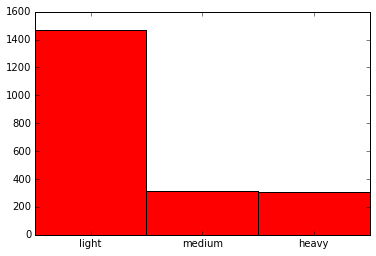

In [23]:
# Lets see how classes are distributed
classes = ['light', 'medium', 'heavy']
freq = np.bincount(y_train)

width = 1.0     # gives histogram aspect to the bar diagram
pos = np.arange(len(classes))
ax = plt.axes()
ax.set_xticks(pos + (width / 2))  
ax.set_xticklabels(classes)

plt.bar(pos, freq, width, color='r')
plt.show()

In [33]:
# Baselane model
baselane_acc = float(max(freq)) / sum(freq)
print "%.2f" % baselane_acc

0.70


In [34]:
# PREPROCESSING


def img_resize(img, t):
    """ Rsizes given images """
    return imresize(img, (shape(img)[0] / t, shape(img)[1] / t))

def rgb2gray(rgb):
  """Convert RGB image to grayscale

    Parameters:
      rgb : RGB image

    Returns:
      gray : grayscale image
  
  """
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])



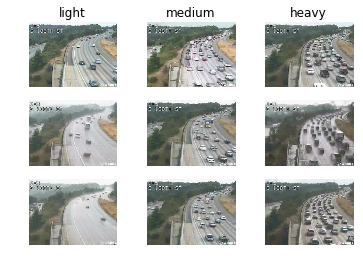

In [35]:
def display_subsample(samples_per_class):
    # Visualize some examples from the dataset.
    # Lets a few examples of training images from each class.
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx], cmap = 'gray')
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()
    returndef display_subsample(samples_per_class):
    # Visualize some examples from the dataset.
    # Lets a few examples of training images from each class.
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx], cmap = 'gray')
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()
    return
display_subsample(3)
display_subsample(3)



In [36]:
# Preprocessing: Resize all data
X_train = np.array([img_resize(img, 2) for img in X_train])
X_test = np.array([img_resize(img, 2) for img in X_test])

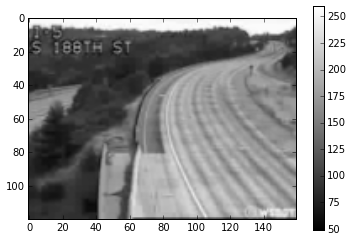

In [37]:

# Preprocessing: Convert features to grescale
X_train = np.array([rgb2gray(img) for img in X_train])



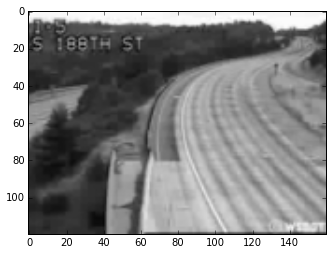

In [38]:

t = (y_train == 0)
light_train = X_train[t]
m = light_train[0:10].mean(0)
plt.imshow(m, cmap='gray')



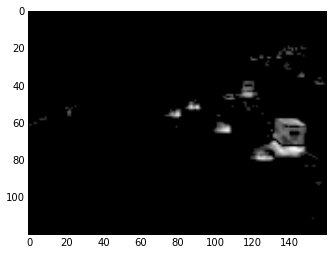

In [52]:
r = X_train[2]
new = r - m
sim = abs(new)
s = sim < 20
sim[s] = 0
plt.imshow(sim, cmap='gray')




ImportError: No module named cv2

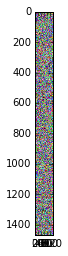

In [12]:
plt.imshow(bg, cmap = 'gray')

In [37]:

# Preprocessing: Convert features to grescale
X_train = np.array([rgb2gray(img) for img in X_train])


In [50]:
X_train.shape

(2087L, 240L, 320L)

(2087L, 240L, 320L)


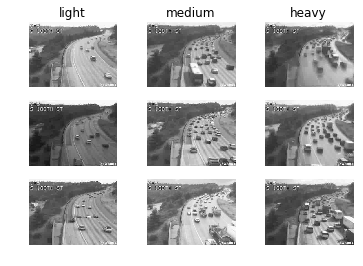

In [51]:
print X_train.shape
display_subsample(3)

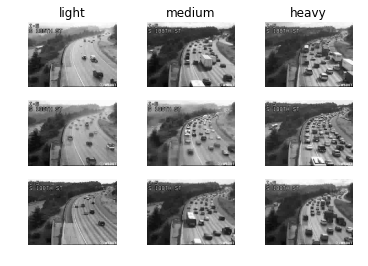

In [53]:
display_subsample(3)

In [60]:
# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train, axis=1)


TypeError: Invalid dimensions for image data

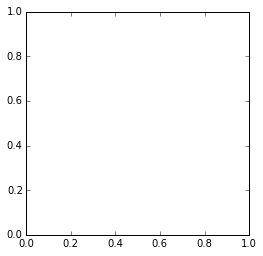

In [59]:
plt.imshow(mean_feat, cmap = 'gray')

In [ ]:
print X_train.shape
print X_test.shape

In [ ]:
# Lets try KNN classifier 
import sklearn
from sklearn.neighbors import KNeighborsClassifier
k = 1
knn = KNeighborsClassifier(k)
knn.fit(X_train, y_train)

In [ ]:
print shape(X_train), X_test.shape

In [ ]:
# Evaluate the classifier on the test set:
num = -1
y_test_hat = knn.predict(X_test)  

In [ ]:
# Check classifier accuracy:
print "Accuracy: %f" % (float(sum(y_test_hat == y_test))/len(y_test))

In [ ]:
# View the confusion matrix:
from sklearn.metrics import confusion_matrix

print confusion_matrix(y_test, y_test_hat)

In [ ]:
?confusion_matrix